# Let's Create a NN with Keras to fit some Models

In [1]:
from tensorflow import keras
from matplotlib import pyplot as plt # To do graphs
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_moons # To create train data to fit the model
import numpy as np


### Keras 
- High level deep learning API that let's you easily build, train and evaluate neural networks



#### Train a model in 3 steps:

1.**Define model, specify:**

- architecture
- number of neurons
- layers
- type of activation function


2. **Compile the model, specify:**

- optimizers
- metrics
- loss function

3. **Fit the model, specify:**

- epochs (number of iterations of the dataset in backpropagation)
- batch size (the data is fed in layers / batches; not all at once)

# Part 1: Creating a NN that makes binary-classifications

In [2]:
X, y=make_moons(500, noise=0.2)

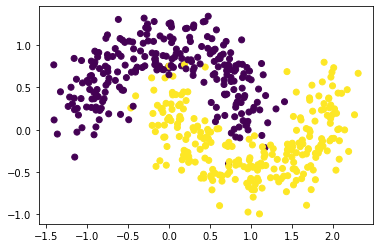

In [3]:
plt.scatter(X[:,0], X[:,1], c=y);

## **Step 1: Definition of the Arquitechture. Building of a model with just 2 Dense layers**

In [4]:
m = Sequential([ 
                Dense(units=4, activation='relu', input_shape=(2,)),   #Activation function = ReLu (Rectified Linear Unit), 4 Nodes, input_shape =(2,) means points (x,y as input)
                Dense(units = 1, activation='sigmoid')]) # Activation function = Sigmoid, 1 Node, 

## **Step 2: Compilation of the Model. Choosing of a loss function, different Optmizers and evaluation metric**

### Optimizers:
    * SGD = Stochastic Gradient Descent with constant learning rate
    * RMSProp = adaptive learning rate; it decays exponentially based on 2 previous steps.
    * Momentum = interprets the gradient as acceleration, usually converges faster, may oscillate around the minimum.
    * Adam = combination of RMSProp and Momentum Optimization. Probably the best of the above.

### Loss functions:
    * MSE =  Minimal Square Error--> Linear Regressions
    * Categorical-Cross-Entropy = Multiclass Classifications
    * log-loss / binary-cross-entropy = binary classification


### **Step 3.1: Fitting of the model with "Adam" Optimizer**

In [5]:
m.compile(optimizer='adam',  
          loss='binary_crossentropy', 
          metrics=['accuracy']) 

In [6]:
m.summary() # The number of parameters of the dense layers are the inputs x nodes = first case 4 nodes x 3 inputs (x,y, category) = 12 for the second layer = 5 = w1,w2,w3,w4 + bias

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [7]:
h_adam = m.fit( X, y, epochs=1000, batch_size = 50, validation_split = 0.20) # Here I decide HOW to train the NN. In this case are 1000 epochs (epochs is when the entire dataset is passed forward and backward through the neural network )
                                                                        # Taking 50 points as batch_size (batch_size hyperparameter that defines number of samples to work) each time and leaving 20% as validation data (test)

Epoch 1/1000
8/8 [==============================] - 0s 18ms/step - loss: 0.6569 - accuracy: 0.6575 - val_loss: 0.6380 - val_accuracy: 0.8400
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6521 - accuracy: 0.6800 - val_loss: 0.6308 - val_accuracy: 0.8500
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6469 - accuracy: 0.6925 - val_loss: 0.6242 - val_accuracy: 0.8600
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6421 - accuracy: 0.7100 - val_loss: 0.6178 - val_accuracy: 0.8700
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6372 - accuracy: 0.7075 - val_loss: 0.6110 - val_accuracy: 0.8800
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6324 - accuracy: 0.7100 - val_loss: 0.6044 - val_accuracy: 0.8800
Epoch 7/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6274 - accuracy: 0.7075 - val_loss: 0.5978 - val_accuracy: 0.8800
Epoch 8/1000
8/8 [=

#### **Evaluation of the model**

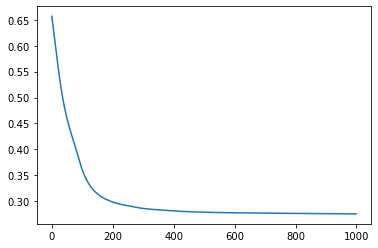

In [9]:
#Plot the learning curve
plt.plot(h_adam.history['loss']);

''

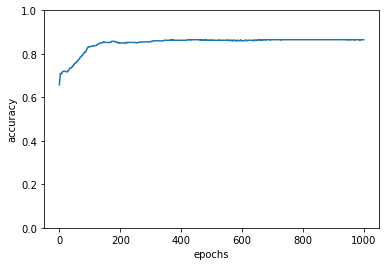

In [10]:
plt.plot(h_adam.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0,1)
;


In [11]:
max(h_adam.history['accuracy'])

0.8650000095367432

### **Step 3.2: Fitting of the model with "RMSProp" Optimizer**

In [12]:
m_rms = Sequential([ 
                Dense(units=4, activation='relu', input_shape=(2,)),   #Activation function = ReLu (Rectified Linear Unit), 4 Nodes, input_shape =(2,) means points (x,y as input)
                Dense(units = 1, activation='sigmoid')]) # Activation function = Sigmoid, 1 Node, 

In [13]:
m_rms.compile(optimizer='RMSProp',  
          loss='binary_crossentropy', 
          metrics=['accuracy']) 

In [14]:
h_rms = m_rms.fit( X, y, epochs=1000, batch_size = 50, validation_split = 0.20) # Here I decide HOW to train the NN. In this case are 1000 epochs (epochs is when the entire dataset is passed forward and backward through the neural network )
                                                                        # Taking 50 points as batch_size (batch_size hyperparameter that defines number of samples to work) each time and leaving 20% as validation data (test)

Epoch 1/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.5523 - accuracy: 0.7200 - val_loss: 0.4291 - val_accuracy: 0.8800
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.5474 - accuracy: 0.7200 - val_loss: 0.4265 - val_accuracy: 0.8700
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.5437 - accuracy: 0.7225 - val_loss: 0.4241 - val_accuracy: 0.8700
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.5403 - accuracy: 0.7200 - val_loss: 0.4215 - val_accuracy: 0.8800
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.5370 - accuracy: 0.7225 - val_loss: 0.4189 - val_accuracy: 0.8700
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.5337 - accuracy: 0.7275 - val_loss: 0.4165 - val_accuracy: 0.8700
Epoch 7/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.5305 - accuracy: 0.7275 - val_loss: 0.4142 - val_accuracy: 0.8700
Epoch 8/1000
8/8 [=

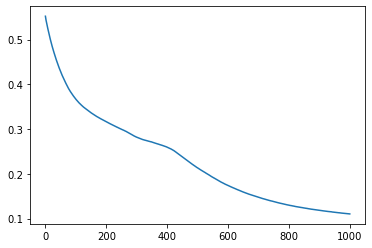

In [16]:
plt.plot(h_rms.history['loss']);

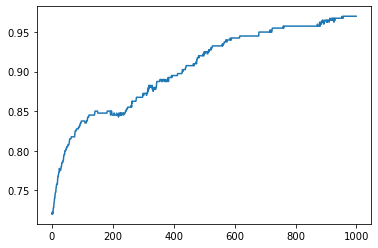

In [17]:
plt.plot(h_rms.history['accuracy']);

In [18]:
max(h_rms.history['accuracy'])

0.9700000286102295

### **Step 3.3: Fitting of the model with "SGD" Optimizer**

In [19]:
m_sgd = Sequential([ 
                Dense(units=4, activation='relu', input_shape=(2,)),   #Activation function = ReLu (Rectified Linear Unit), 4 Nodes, input_shape =(2,) means points (x,y as input)
                Dense(units = 1, activation='sigmoid')]) # Activation function = Sigmoid, 1 Node, 

In [20]:
m_sgd.compile(optimizer='SGD',  
          loss='binary_crossentropy', 
          metrics=['accuracy']) 

In [21]:
h_sgd = m_sgd.fit( X, y, epochs=1000, batch_size = 50, validation_split = 0.20) # Here I decide HOW to train the NN. In this case are 1000 epochs (epochs is when the entire dataset is passed forward and backward through the neural network )
                                                                        # Taking 50 points as batch_size (batch_size hyperparameter that defines number of samples to work) each time and leaving 20% as validation data (test)

Epoch 1/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.5923 - accuracy: 0.8325 - val_loss: 0.5310 - val_accuracy: 0.9200
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.5858 - accuracy: 0.8325 - val_loss: 0.5256 - val_accuracy: 0.9200
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.5795 - accuracy: 0.8325 - val_loss: 0.5204 - val_accuracy: 0.9200
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.5734 - accuracy: 0.8325 - val_loss: 0.5153 - val_accuracy: 0.9200
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.5675 - accuracy: 0.8300 - val_loss: 0.5103 - val_accuracy: 0.9200
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.5618 - accuracy: 0.8300 - val_loss: 0.5053 - val_accuracy: 0.9200
Epoch 7/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.5563 - accuracy: 0.8250 - val_loss: 0.5005 - val_accuracy: 0.9200
Epoch 8/1000
8/8 [=

In [22]:
score_sgd = m_sgd.evaluate(X, y)
print(score_sgd)

16/16 [==============================] - 0s 1ms/step - loss: 0.2917 - accuracy: 0.8660
[0.2916834056377411, 0.8659999966621399]


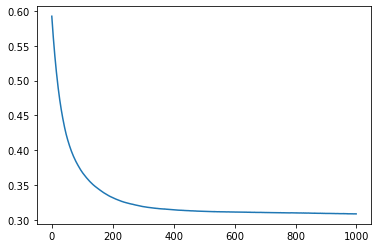

In [23]:
plt.plot(h_sgd.history['loss']);

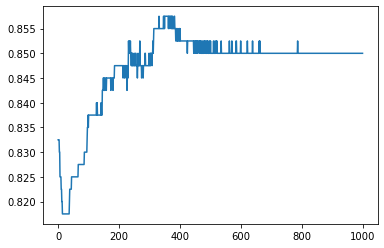

In [24]:
plt.plot(h_sgd.history['accuracy']);

In [25]:
print(max(h_sgd.history['accuracy']),max(h_rms.history['accuracy']),max(h_adam.history['accuracy']))

0.8575000166893005 0.9700000286102295 0.8650000095367432


In [26]:
print(h_sgd.history['accuracy'][100], h_rms.history['accuracy'][100],h_adam.history['accuracy'][100])

0.8374999761581421 0.8374999761581421 0.8324999809265137


In [27]:
print(h_sgd.history['accuracy'][150], h_rms.history['accuracy'][150],h_adam.history['accuracy'][150])

0.8424999713897705 0.8500000238418579 0.8525000214576721


In [28]:
print(h_sgd.history['accuracy'][200], h_rms.history['accuracy'][200],h_adam.history['accuracy'][200])

0.8475000262260437 0.8450000286102295 0.8500000238418579


### In conclusion changing the optimizers doesn't change the final accurracy score significantly. The winner in this case is the RMSProp but SGD has a faster improvement in the accurracy. In this case the cost of calculation is low but it worth to take into account this behaviour for future analysis.

-----

# Part 2: Creating a NN that recognices a handwritten number (Working with MNIST Data)


In [29]:
from tensorflow.keras.datasets import mnist

### **Step 1: Download and split the data in train-test**

In [30]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

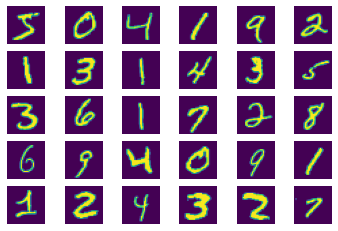

In [31]:
for i in range(30):
        plt.subplot(5, 6, i+1) # it means 4 files, 5 columns and the position
        plt.imshow(xtrain[i])
        plt.axis('off')

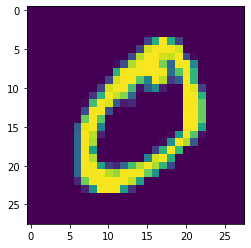

In [32]:
plt.imshow(xtrain[1]);

In [33]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape) #The train data has 60.000 images of 28x28 pixels

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [34]:
print(type(xtrain),type(ytrain))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### **Step 2: Defining the Arquitechture**

This model is going to have 3 dense layers and this kind of layers requires data as an 1D-array. So we need to re-shape the 28x28 into 1D of 28x28=784 (flatten). The "y" needs to be one-hot-encoded to fit the SoftMax activation function.

In [35]:
xtrain_flat = xtrain.reshape((60000, 28*28))
xtrain.shape, xtrain_flat.shape

((60000, 28, 28), (60000, 784))

In [36]:
xtest_flat = xtest.reshape((10000, 28*28))
xtest.shape, xtest_flat.shape

((10000, 28, 28), (10000, 784))

In [37]:
ytrain_one_hot = keras.utils.to_categorical(ytrain)
ytrain.shape, ytrain_one_hot.shape

((60000,), (60000, 10))

In [38]:
model = keras.models.Sequential([
    
    keras.layers.Dense(
        units=64,                                  # units=neurons=nodes="number of output features"
        activation=keras.activations.relu,
        input_shape=(784, )                      # number of features of your input data
    ), 
    # activation(np.dot(X, w))
    keras.layers.Dense(
        units=32,                                  
        activation=keras.activations.relu,
    ),  
    # output layer
    keras.layers.Dense(
        units=10,                                  #activation function SoftMax, for multiple-cathegorical-classifications.
        activation=keras.activations.softmax    
    )    
])

In [39]:
model.summary() # 64 nodes * 784 inputs + 64 connections of the bias term for the first Layer, same logic for the next layers.

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


## **Step 3: Compiling the model**

In [40]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),     # Algorithm for numerical optimization --> Adam
    loss=keras.losses.CategoricalCrossentropy(),              # Loss function --> multicategorical classifications 
    metrics=[keras.metrics.CategoricalAccuracy()])            # Evaluation metric--> accurracy

## **Step 4: Fitting the model**

In [41]:
results = model.fit(xtrain_flat, ytrain_one_hot, 
              epochs=10,            # number of iterations through the complete dataset 
              batch_size=128,        # number of data points from the training data used
              validation_split=0.2  # 20% of the batch size that is reserved for validation 
)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 3.6177 - categorical_accuracy: 0.7381 - val_loss: 0.7335 - val_categorical_accuracy: 0.8096
Epoch 2/10
375/375 [==============================] - 1s 1ms/step - loss: 0.6068 - categorical_accuracy: 0.8471 - val_loss: 0.5117 - val_categorical_accuracy: 0.8703
Epoch 3/10
375/375 [==============================] - 1s 1ms/step - loss: 0.4102 - categorical_accuracy: 0.8905 - val_loss: 0.4110 - val_categorical_accuracy: 0.9008
Epoch 4/10
375/375 [==============================] - 1s 1ms/step - loss: 0.3235 - categorical_accuracy: 0.9147 - val_loss: 0.3571 - val_categorical_accuracy: 0.9122
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2733 - categorical_accuracy: 0.9271 - val_loss: 0.3184 - val_categorical_accuracy: 0.9229
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2360 - categorical_accuracy: 0.9339 - val_loss: 0.3170 - val_categorical_accuracy: 0.9239
Epoc

### Evaluate the model

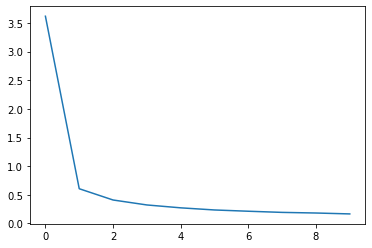

In [42]:
plt.plot(results.history['loss']);

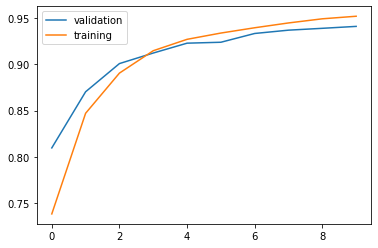

In [43]:
plt.plot(results.history['val_categorical_accuracy'], label='validation')
plt.plot(results.history['categorical_accuracy'], label='training')
plt.legend();

In [44]:
print(round(results.history['val_categorical_accuracy'][-1],3),round(results.history['categorical_accuracy'][-1], 3))


0.941 0.952


In [45]:
print(round((results.history['val_categorical_accuracy'][-1]-results.history['categorical_accuracy'][-1]), 3)*100)
# With less than 3% of difference between the train data and the test data I consider the model NOT to be Overfitted.

-1.0999999999999999


-----

# Part 3: Creating a CONVOLUTIONAL NN that recognices a handwritten number


### **Step 1: We use the previous Data Set**

### **Step 2: Defining the Arquitechture**

In this case we are going to use 10 layers, with different characteristics. Padding, Pooling, Filters, Dense, Flatten, etc.

### Re-Shaping
    * The CNN requires a 4D input (and not 1D like before with the "Dense" layer.


In [46]:
X_train_reshaped = xtrain.reshape((60000, 28, 28, 1))
X_test_reshaped = xtest.reshape((10000, 28, 28, 1))


# scale the output to range 0,1
X_train_reshaped = X_train_reshaped.astype('float32') / 255
X_test_reshaped = X_test_reshaped.astype('float32') / 255


y_train_reshaped = keras.utils.to_categorical(ytrain)
y_test_reshaped = keras.utils.to_categorical(ytest)


In [47]:
from tensorflow.keras import backend as K

K.clear_session()

model_CNN = keras.models.Sequential()

# 1st CNN layer output: shape (None, 28, 28, 6). 
model_CNN.add(keras.layers.Conv2D(filters=6,
                            padding='same', ## It adds the "same" Value around the output matrix. 
                            activation ='relu', #I choose Relu because is one with the fastest Backpropagation processes.
                            kernel_size=(5,5),
                            input_shape=(28, 28, 1) # rows, cols, color channels
                            ))
model_CNN.add(keras.layers.BatchNormalization())  # After the activation this function "normalizes" the output so helps to decrease the training times
#sometimes this extra step could lead to an slightly extension of each the training, but it compensates with less epochs.

# 1st MaxPool layer output: (None, 14, 14, 6) MaxPooling reduces the size of the matrix taking the maximun value of in this case 2x2 square and condensing into only 1 value
#the maximal of the 4 values.
model_CNN.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

# 2nd CNN layer output: shape (None, 10, 10, 16)
model_CNN.add(keras.layers.Conv2D(filters=16,
                            # padding='same', in this case I let the CNN to reduce the size of the input (from 14x14 to 10x10) because I'm trying to keep some sort of
                              #relation between the size and the nodes of the outputs.
                            activation ='relu',
                            kernel_size=(5,5),
                            ))

# 2nd MaxPool layer: (None, 5, 5, 16)
model_CNN.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

# Flatten: (None, 400) #This turns a 5x5x16 output into a 1D Input that is what the Dense Layer requires.
model_CNN.add(keras.layers.Flatten())

# 1st Dense: (None, 60)
# regularization with penalty term
model_CNN.add(keras.layers.Dense(60, activation='relu', kernel_regularizer='l1'))  # I add some L1, Lasso Regularization.

# 2nd Dense: (None, 50)
model_CNN.add(keras.layers.Dense(50, activation='relu'))
# regularization without penalty term
model_CNN.add(keras.layers.BatchNormalization())
# Output Layer: (None, 10)  <-- softmax , because I need to multicategorize 10 different possibilities (from 0 to 9)
model_CNN.add(keras.layers.Dense(10, activation='softmax'))

In [48]:
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 6)         24        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 60)                2

### **Step 3: Compiling the model**

In [49]:
model_CNN.compile(loss='categorical_crossentropy', metrics=['accuracy'])

### **Step 4: Fitting the model**

In [50]:
results_CNN = model_CNN.fit(X_train_reshaped, y_train_reshaped, epochs=10, batch_size=200, validation_split=0.1)

Epoch 1/10
270/270 [==============================] - 9s 32ms/step - loss: 2.9402 - accuracy: 0.9193 - val_loss: 2.3930 - val_accuracy: 0.2013
Epoch 2/10
270/270 [==============================] - 9s 32ms/step - loss: 0.3733 - accuracy: 0.9630 - val_loss: 0.3864 - val_accuracy: 0.9612
Epoch 3/10
270/270 [==============================] - 9s 32ms/step - loss: 0.3159 - accuracy: 0.9707 - val_loss: 0.2979 - val_accuracy: 0.9753
Epoch 4/10
270/270 [==============================] - 9s 31ms/step - loss: 0.2954 - accuracy: 0.9730 - val_loss: 0.3355 - val_accuracy: 0.9628
Epoch 5/10
270/270 [==============================] - 8s 31ms/step - loss: 0.2797 - accuracy: 0.9758 - val_loss: 0.2897 - val_accuracy: 0.9703
Epoch 6/10
270/270 [==============================] - 9s 32ms/step - loss: 0.2724 - accuracy: 0.9760 - val_loss: 0.3370 - val_accuracy: 0.9550
Epoch 7/10
270/270 [==============================] - 8s 31ms/step - loss: 0.2649 - accuracy: 0.9773 - val_loss: 0.2730 - val_accuracy: 0.9783

### Evaluate the model

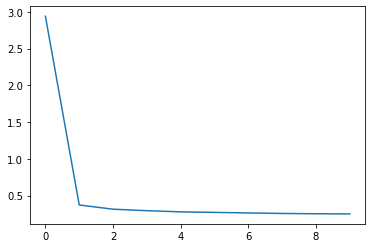

In [51]:
plt.plot(results_CNN.history['loss']);

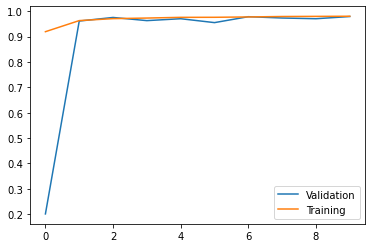

In [52]:
plt.plot(results_CNN.history['val_accuracy'], label='Validation')
plt.plot(results_CNN.history['accuracy'], label='Training')
plt.legend();

In [53]:
print(round(results_CNN.history['accuracy'][-1],3),round(results_CNN.history['val_accuracy'][-1],3))

0.98 0.979


In [54]:
print(round(max(results_CNN.history['accuracy']),3),round(max(results_CNN.history['val_accuracy']),3)) 

0.98 0.979


In [55]:
print(round(results.history['val_categorical_accuracy'][-1],3),round(results.history['categorical_accuracy'][-1], 3))

0.941 0.952


### CNN performs much better than the first NN. This result is not a surprise but CNN requires much more time to get configurated and to train. CNN also fluctuates more.